In [3]:
from ExcitonBSEKeldysh import ExcitonMoS2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
N1=15
gamma=np.array([0.,0.,0.])
M=np.array([0,0.5,0.])
K=np.array([1./3.,1./3.,0.])
kpoints=[];N1=N1;N2=int(N1/2);N3=int(np.sqrt(N1**2+N2**2))
for i in range(N1):
    kpoints.append(i*M/N1+(N1-i)*gamma/N1)
for i in range(N2+1):
    kpoints.append(i*K/N2+(N2-i)*M/N2)
kpoints=np.array(kpoints)

In [28]:
Exciton=ExcitonMoS2(epsilon=1,N=2*N1,vb=[6],cb=[7],spin_orbit=False,cutoff=np.inf,shift=0.7)
Exciton_SOC=ExcitonMoS2(epsilon=1,N=2*N1,vb=[12,13],cb=[14,15],spin_orbit=True,cutoff=np.inf,shift=0.7)

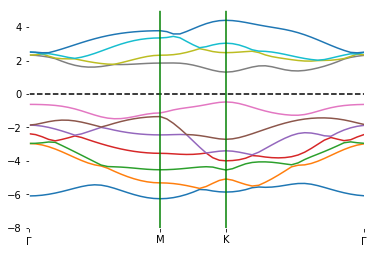

In [29]:
Exciton_cut.plotBandStructure()


In [31]:
E_bands=[]
E_bands_SOC=[]
for q in kpoints:
    Exciton.constuctExcitonHamiltonian(Q=q)
    E,D=np.linalg.eigh(Exciton.HH)
    E_bands.append(E)
    
    Exciton_SOC.constuctExcitonHamiltonian(Q=q)
    E,D=np.linalg.eigh(Exciton_SOC.HH)
    E_bands_SOC.append(E)
    
    print(str(q)+'  '+str(E[:4]))
    
E_bands=np.array(E_bands)
E_bands_SOC=np.array(E_bands_SOC)

[0. 0. 0.]  [1.86254742 1.86254748 1.8685662  1.86856628]
[0.         0.03333333 0.        ]  [1.87871551 1.87902384 1.88583617 1.91010516]
[0.         0.06666667 0.        ]  [1.92472453 1.92532283 1.93459383 1.95097395]
[0.  0.1 0. ]  [1.99335664 1.99419665 2.00686855 2.02892301]
[0.         0.13333333 0.        ]  [2.07455275 2.07552798 2.09157319 2.09858201]
[0.         0.16666667 0.        ]  [2.15381678 2.15457403 2.15627706 2.16860345]
[0.  0.2 0. ]  [2.09119324 2.11496222 2.15669306 2.16507944]
[0.         0.23333333 0.        ]  [2.07594127 2.08356452 2.14161818 2.14219968]
[0.         0.26666667 0.        ]  [1.99588281 2.08082037 2.11668686 2.13806471]
[0.  0.3 0. ]  [2.05110661 2.10795139 2.13524811 2.14922562]
[0.         0.33333333 0.        ]  [1.95154205 2.14998008 2.15223024 2.15628718]
[0.         0.36666667 0.        ]  [2.01538009 2.06942778 2.06945183 2.12356897]
[0.  0.4 0. ]  [1.9004737  1.99750626 1.99776126 2.05457972]
[0.         0.43333333 0.        ]  [1.921

In [32]:
import matplotlib
matplotlib.rc('axes',edgecolor='white')

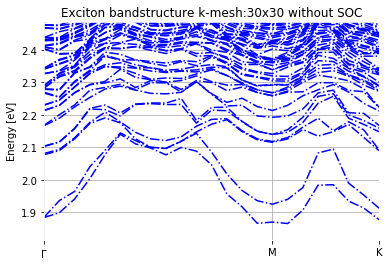

In [37]:
plt.plot(E_bands[:,:100],'-.',color='blue')
plt.ylim([np.min(E_bands)-0.05,Exciton_cut.Egap])
plt.xlim([0,len(kpoints)-1])
plt.xticks([0,N1,N2+N1],['$\Gamma$','M','K'])
plt.grid()
plt.ylabel('Energy [eV]')
plt.title('Exciton bandstructure k-mesh:30x30 without SOC')
plt.savefig('Exciton_BS_without_SOC.png',dpi=600)

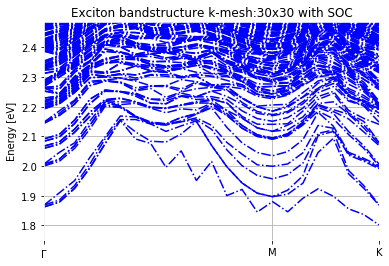

In [41]:
plt.plot(E_bands_SOC[:,:400],'-.',color='blue')
plt.ylim([np.min(E_bands_SOC)-0.05,Exciton_cut.Egap])
plt.xlim([0,len(kpoints)-1])
plt.xticks([0,N1,N2+N1],['$\Gamma$','M','K'])
plt.grid()
plt.ylabel('Energy [eV]')
plt.title('Exciton bandstructure k-mesh:30x30 with SOC')
plt.savefig('Exciton_BS_with_SOC.png',dpi=600)